In [20]:
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [21]:
by_artist = pd.read_csv('spotify/data/data_by_artist.csv')
by_genre = pd.read_csv('spotify/data/data_by_genres.csv')
by_year = pd.read_csv('spotify/data/data_by_year.csv')
w_genres = pd.read_csv('spotify/data/data_w_genres.csv')
data = pd.read_csv('spotify/data/data.csv')

In [22]:
print(by_artist.shape)
display(by_artist.head(3))
by_artist.describe(include='all')

(27621, 15)


,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.0,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.0,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.0,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7


,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,27621,27621.000000,27621.000000,2.762100e+04,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000
unique,27621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Monty Sharma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.504651,0.544411,2.374886e+05,0.493708,0.166661,0.203603,-11.222480,0.096180,115.439232,0.516032,34.288478,5.409942,0.767170,14.313493
std,NaN,0.369788,0.176098,1.209766e+05,0.253566,0.292133,0.140311,5.819377,0.116062,25.138470,0.243304,22.104194,3.485676,0.422643,53.867027
min,NaN,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,0.128784,0.429000,1.819730e+05,0.282000,0.000004,0.111667,-14.097000,0.039500,98.725500,0.334000,13.511111,2.000000,1.000000,2.000000
50%,NaN,0.493000,0.555667,2.176930e+05,0.501000,0.001610,0.162850,-10.135333,0.052644,114.950000,0.528500,39.000000,6.000000,1.000000,3.000000
75%,NaN,0.901000,0.673000,2.660000e+05,0.699000,0.188000,0.247371,-6.906000,0.098000,129.612647,0.705000,51.000000,8.000000,1.000000,9.000000


In [23]:
print(by_genre.shape)
display(by_genre.head(3))
by_genre.describe(include='all')

(2664, 14)


,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1


,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
count,2664,2664.000000,2664.000000,2.664000e+03,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000,2664.000000
unique,2664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,nordic house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.399060,0.536555,2.493834e+05,0.564704,0.200024,0.193866,-10.376636,0.083746,118.848316,0.499293,40.119079,5.915541,0.843093
std,NaN,0.313948,0.148557,9.056834e+04,0.227515,0.256310,0.088000,4.994773,0.080169,17.525562,0.197600,16.018515,3.390251,0.363781
min,NaN,0.000003,0.059851,3.094600e+04,0.002825,0.000000,0.022200,-37.613463,0.022502,37.764836,0.004886,0.000000,0.000000,0.000000
25%,NaN,0.120052,0.445851,2.054136e+05,0.403441,0.005402,0.144772,-12.387067,0.045427,109.294764,0.362073,33.000000,3.000000,1.000000
50%,NaN,0.319612,0.544778,2.370955e+05,0.600476,0.077899,0.180000,-9.288375,0.060379,118.747590,0.508720,43.000000,7.000000,1.000000
75%,NaN,0.657829,0.643117,2.723142e+05,0.733009,0.320169,0.220329,-6.945217,0.090329,127.203333,0.638521,50.879969,9.000000,1.000000


In [5]:
genres = []
for x in by_genres.genres:
    genres.append(x)
print(genres[:30])

['432hz', '[]', 'a cappella', 'abstract', 'abstract beats', 'abstract hip hop', 'accordeon', 'accordion', 'acid house', 'acid jazz', 'acid rock', 'acid trance', 'acousmatic', 'acoustic blues', 'acoustic pop', 'acoustic punk', 'adoracion', 'adult standards', 'adventista', 'afghan pop', 'african gospel', 'african percussion', 'african reggae', 'african rock', 'afro dancehall', 'afro house', 'afro psych', 'afro-cuban traditional', 'afro-funk', 'afrobeat']


In [24]:
print(by_year.shape)
display(by_year.head(3))
by_year.describe(include='all')

(100, 14)


,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1921,0.895823,0.425661,229911.914062,0.236784,0.322330,0.215814,-17.095437,0.077258,100.397758,0.425495,0.351562,7,1
1,1922,0.939236,0.480000,167904.541667,0.237026,0.440470,0.238647,-19.179958,0.115419,101.376139,0.534056,0.138889,10,1
2,1923,0.976329,0.568462,178356.301775,0.246936,0.401932,0.236656,-14.373882,0.098619,112.456598,0.624788,5.727811,0,1


,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,1970.500000,0.552625,0.537485,226930.361382,0.455864,0.192160,0.209335,-11.916648,0.101247,116.026461,0.536384,27.223173,4.190000,1.0
std,29.011492,0.282113,0.052033,25270.584548,0.164619,0.129622,0.018237,3.131902,0.066003,5.754132,0.058394,21.003768,3.586436,0.0
min,1921.000000,0.228712,0.403515,167904.541667,0.204252,0.035948,0.167161,-19.179958,0.051050,100.397758,0.373623,0.138889,0.000000,1.0
25%,1945.750000,0.282738,0.500161,208882.913176,0.286154,0.098798,0.198728,-14.309401,0.065124,111.802986,0.495800,2.939625,0.000000,1.0
50%,1970.500000,0.452951,0.544746,234673.799962,0.498728,0.124916,0.207946,-11.761679,0.086237,117.597018,0.548000,33.655500,5.000000,1.0
75%,1995.250000,0.867022,0.571744,248234.122455,0.600955,0.277763,0.220389,-9.715595,0.104962,120.819829,0.574516,44.411125,7.000000,1.0
max,2020.000000,0.976329,0.673077,266387.733000,0.693696,0.583955,0.264347,-6.694271,0.485278,123.656818,0.668574,69.655500,10.000000,1.0


In [25]:
print(data.shape)
display(data.head(3))
data.describe(include='all')

(169909, 19)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
count,169909.000000,169909,169909.000000,1.699090e+05,169909.000000,169909.000000,169909,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909,169909.000000,169909,169909.000000,169909.000000,169909.000000,169909.000000
unique,NaN,33375,NaN,NaN,NaN,NaN,169909,NaN,NaN,NaN,NaN,NaN,132940,NaN,10882,NaN,NaN,NaN,NaN
top,NaN,['Эрнест Хемингуэй'],NaN,NaN,NaN,NaN,14wpG5eRZwU73l6TYrvgkT,NaN,NaN,NaN,NaN,NaN,Summertime,NaN,1945,NaN,NaN,NaN,NaN
freq,NaN,1215,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,62,NaN,1449,NaN,NaN,NaN,NaN
mean,0.493214,NaN,0.538150,2.314062e+05,0.488593,0.084863,NaN,0.161937,5.200519,0.206690,-11.370289,0.708556,NaN,31.556610,NaN,0.094058,116.948017,0.532095,1977.223231
std,0.376627,NaN,0.175346,1.213219e+05,0.267390,0.278679,NaN,0.309329,3.515257,0.176796,5.666765,0.454429,NaN,21.582614,NaN,0.149937,30.726937,0.262408,25.593168
min,0.000000,NaN,0.000000,5.108000e+03,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,NaN,0.417000,1.710400e+05,0.263000,0.000000,NaN,0.000000,2.000000,0.098400,-14.470000,0.000000,NaN,12.000000,NaN,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,NaN,0.548000,2.086000e+05,0.481000,0.000000,NaN,0.000204,5.000000,0.135000,-10.474000,1.000000,NaN,33.000000,NaN,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,NaN,0.667000,2.629600e+05,0.710000,0.000000,NaN,0.086800,8.000000,0.263000,-7.118000,1.000000,NaN,48.000000,NaN,0.075400,135.712000,0.749000,1999.000000


In [27]:
songs_named_Summertime = data[data['name'] == 'Summertime']
songs_named_Summertime[:3]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
2036,0.993,['Oscar Peterson'],0.477,177697,0.0364,0,6FJlU3JumRmgHk4BMJTwKZ,0.950000,0,0.128,-25.996,0,Summertime,18,1959-01-01,0.0416,135.954,0.0944,1959
10053,0.897,['Carmen McRae'],0.271,177920,0.2300,0,3LWUgY1TPrUMWewxfr54HU,0.000940,9,0.101,-12.216,0,Summertime,11,1959-01-01,0.0285,86.396,0.0856,1959
10056,0.908,"['Lena Horne', 'Harry Belafonte']",0.351,192827,0.2540,0,3fbC6CbJVApLgL7L4mxSTQ,0.000003,5,0.091,-11.343,0,Summertime,17,1959,0.0319,100.481,0.2430,1959


In [28]:
top20_artists = data.artists.value_counts()[:20].index
top20_artists

Index(['['Эрнест Хемингуэй']', '['Francisco Canaro']', '['Эрих Мария Ремарк']',
       '['Ignacio Corsini']', '['Frank Sinatra']', '['Bob Dylan']',
       '['The Rolling Stones']', '['Johnny Cash']', '['The Beach Boys']',
       '['Elvis Presley']', '['Francisco Canaro', 'Charlo']', '['Queen']',
       '['Dean Martin']', '['The Beatles']', '['Miles Davis']',
       '['Billie Holiday']', '['Fleetwood Mac']', '['Ella Fitzgerald']',
       '['Lead Belly']', '['Led Zeppelin']'],
      dtype='object')

In [12]:
top20_artists_data = pd.DataFrame()
for x in top20_artists:
    top20_artists_data = top20_artists_data.append(data[data['artists'] == x])

In [13]:
top20_artists_data.head(2)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
204,0.492,['Эрнест Хемингуэй'],0.626,109512,0.225,1,4hmVv3I9OPCbI5FbRa5lUI,0.0,7,0.164,-16.619,1,Часть 58.3 & Часть 59.1 - Зеленые холмы Африки,0,1935,0.949,174.223,0.534,1935
215,0.333,['Эрнест Хемингуэй'],0.714,118585,0.178,1,4l9f8JE1UmmIU1ITw6CjVx,0.0,7,0.270,-15.534,1,Часть 2.3 & Часть 3.1 - Зеленые холмы Африки,0,1935,0.892,130.663,0.552,1935


In [14]:
top20_artists_data.tail(2)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
168520,0.1790,['Led Zeppelin'],0.451,268880,0.555,0,3Qjm0halGOZZGIS1tNaXlI,0.00327,2,0.077,-13.150,1,Ramble On - 2007 Remaster,50,2007,0.0344,98.683,0.834,2007
168568,0.0701,['Led Zeppelin'],0.397,255507,0.723,0,3I7a9joX0lJnK9XzE38GnD,0.07030,2,0.142,-9.197,1,Heartbreaker - 2007 Remaster,50,2007,0.0884,96.894,0.543,2007


In [43]:
kmeans = KMeans(n_clusters=10)
y = kmeans.fit_predict(data[['acousticness','danceability','energy','explicit','instrumentalness','liveness',
                             'loudness','mode','popularity','speechiness','tempo','valence','year']])
data['song_cluster'] = y

data.head(:3)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,song_cluster
0,0.995,['Carl Woitschach'],0.708,158648,0.19500,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,6
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.01350,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,2
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.22000,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,6
3,0.995,['Francisco Canaro'],0.781,180760,0.13000,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,6
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.20400,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,2
5,0.995,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.12000,0,6NxAf7M8DNHOBTmEd3JSO5,0.911000,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928,2
6,0.956,"['Franz Liszt', 'Vladimir Horowitz']",0.444,136627,0.19700,0,6O0puPuyrxPjDTHDUgsWI7,0.435000,11,0.0744,-17.226,1,"Valse oubliée No. 1 in F-Sharp Major, S. 215/1",0,1928,0.0400,80.495,0.3050,1928,2
7,0.988,['Carl Woitschach'],0.555,153967,0.42100,0,6OJjveoYwJdIt76y0Pxpxw,0.836000,1,0.1050,-9.878,1,Per aspera ad astra,0,1928,0.0474,123.310,0.8570,1928,6
8,0.995,"['Francisco Canaro', 'Charlo']",0.683,162493,0.20700,0,6OaJ8Bh7lsBeYoBmwmo2nh,0.206000,9,0.3370,-9.801,0,Moneda Corriente - Remasterizado,0,1928-10-03,0.1270,119.833,0.4930,1928,6
9,0.846,['Seweryn Goszczyński'],0.674,111600,0.20500,0,6PrZexNb16cabXR8Q418Xc,0.000000,9,0.1700,-20.119,1,Chapter 1.3 - Zamek kaniowski,0,1928,0.9540,81.249,0.7590,1928,2


In [55]:
# Some of the most popular songs in cluster 1
data[(data['song_cluster'] == 1) & (data['popularity'] >= 80)][:3]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,song_cluster
82641,0.4300,"['Marvin Gaye', 'Tammi Terrell']",0.663,151667,0.600,0,7tqhbajSfrz2F7E1Z75ASX,0.00000,7,0.184,-10.870,1,Ain't No Mountain High Enough,80,1967-08-29,0.0320,129.991,0.800,1967,1
83640,0.0644,['Fleetwood Mac'],0.828,257800,0.492,0,0ofHAoxe9vBkTCp2UQIavz,0.00428,0,0.128,-9.744,1,Dreams - 2004 Remaster,80,1977-02-04,0.0276,120.151,0.789,1977,1
83840,0.0591,['AC/DC'],0.573,208400,0.913,0,2zYzyRzz6pRmhPzyfMEC8s,0.00173,6,0.156,-4.793,0,Highway to Hell,83,1979-07-27,0.1320,115.715,0.422,1979,1


In [60]:
# Some of the most popular songs in cluster 2
data[(data['song_cluster'] == 2) & (data['popularity'] >= 40)][:3]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,song_cluster
78241,0.996,['Bessie Smith'],0.614,177133,0.0423,0,2wAfHM7Whz67VFbdanhZlk,0.002930,4,0.183,-12.033,1,Nobody Knows You When You're Down and Out,44,1923,0.0535,89.822,0.211,1923,2
78541,0.725,['Fats Waller'],0.651,183560,0.0867,0,0eInL1bLAFdHJDL04R0OCP,0.000065,5,0.169,-18.882,1,Two Sleepy People,41,1926,0.0480,87.221,0.540,1926,2
78840,0.586,['Louis Armstrong'],0.673,201467,0.3770,0,0RNxWy0PC3AyH4ThH3aGK6,0.000000,0,0.332,-14.141,1,Mack the Knife,50,1929,0.0697,88.973,0.713,1929,2


In [61]:
# Some of the most popular songs in cluster 3
data[(data['song_cluster'] == 3) & (data['popularity'] >= 40)][:3]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,song_cluster
3366,0.7280,['Mia Martini'],0.248,283893,0.483,0,5UKMdUAChYAllKDye6qDGb,0.000004,9,0.631,-11.279,1,Minuetto,58,1973-06-23,0.0678,191.107,0.439,1973,3
4192,0.0414,['Australian Crawl'],0.613,210720,0.772,0,1kxPRJGVKGqjJM7BB44p0p,0.000000,0,0.240,-6.971,1,Errol - Remastered,56,1981-01-01,0.0422,164.825,0.785,1981,3
4198,0.8530,['Samira Said'],0.299,464262,0.440,0,2tXyyteJJ4wS1Jt6D23fCI,0.000000,11,0.220,-7.624,0,أل جانى بعد يومين,41,1981-01-01,0.0372,183.895,0.461,1981,3


In [62]:
# Some of the most popular songs in cluster 4
data[(data['song_cluster'] == 4) & (data['popularity'] >= 40)][:3]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,song_cluster
2782,0.0895,['Betty Harris'],0.694,190109,0.691,0,3M0nozpvaNSj5WOF5JeW45,0.00387,10,0.293,-7.499,0,Ride Your Pony,41,1967-06-27,0.0530,123.244,0.961,1967,4
2845,0.4030,['Los Gatos'],0.506,176000,0.611,0,4J2xMy0kakU9sAin1uppxb,0.00000,11,0.190,-4.977,1,La Balsa,46,1967-02-13,0.0313,125.925,0.646,1967,4
2963,0.5700,['Charles Aznavour'],0.438,195080,0.687,0,6SsQ4eeyzgJirHaWABOK9Q,0.00000,0,0.140,-5.968,0,Désormais,45,1969,0.0448,123.178,0.460,1969,4


In [ ]:
# The cell below is where I was experimenting with web scraping

In [ ]:
#url = 'http://google.com/search?q=' + 'What%20genre%20is%20justin%20bieber' + query
# For avoid 403-error using User-Agent
#req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"})
#response = urllib.request.urlopen( req )
#html = response.read()
# Parsing response
#soup = BeautifulSoup(html, 'html.parser')
#s = str(soup)
#print(s)

In [20]:
#s = 'gfgfdAAA1234ZZZuijjk'
#start = s.find('AAA') + 3
#end = s.find('ZZZ', start)
#s[start:end]

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>What genre is queen - Google Search</title><script nonce="PR8HyOhQ8mrfKKsO7mqimw==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"==c||"q"==c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!=document.documentElement;a=a.parentElement)if("A"==a.tagName){a="1"==a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.go
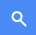
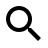
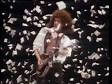
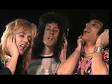
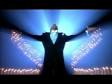
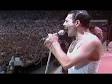
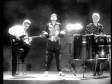
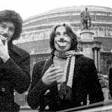

In [25]:
from bs4 import BeautifulSoup
import urllib.request

genres = list(by_genres.genres.values)

# List with google queries I want to make
desired_google_queries = ['queen']

for query in desired_google_queries:
    # Constracting http query
    url = 'http://google.com/search?q=' + 'What%20genre%20is%20' + query
    # For avoid 403-error using User-Agent
    req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"})
    response = urllib.request.urlopen( req )
    html = response.read()
    # Parsing response
    soup = BeautifulSoup(html, 'html.parser')
    s = str(soup)
    print(s)
    for genre in genres:
        if genre in s:
            print(genre)
        else:
            pass
    #start = s.find('Genre(s)') + len('Genres(s)')
    #end = s.find('Years active', start)
    #print(query + ':' + s[start:end])
    # Extracting number of results
    #resultStats = str(soup.find(id="resultStats"))
    #print(resultStats)

In [24]:
genres

['432hz',
 '[]',
 'a cappella',
 'abstract',
 'abstract beats',
 'abstract hip hop',
 'accordeon',
 'accordion',
 'acid house',
 'acid jazz',
 'acid rock',
 'acid trance',
 'acousmatic',
 'acoustic blues',
 'acoustic pop',
 'acoustic punk',
 'adoracion',
 'adult standards',
 'adventista',
 'afghan pop',
 'african gospel',
 'african percussion',
 'african reggae',
 'african rock',
 'afro dancehall',
 'afro house',
 'afro psych',
 'afro-cuban traditional',
 'afro-funk',
 'afrobeat',
 'afrobeat brasileiro',
 'afrofuturism',
 'afrofuturismo brasileiro',
 'afropop',
 'afroswing',
 'aggrotech',
 'alabama indie',
 'alabama metal',
 'alabama rap',
 'albanian pop',
 'alberta country',
 'alberta hip hop',
 'album rock',
 'albuquerque indie',
 'alt-idol',
 'alternative americana',
 'alternative country',
 'alternative dance',
 'alternative emo',
 'alternative hip hop',
 'alternative metal',
 'alternative pop',
 'alternative pop rock',
 'alternative r&b',
 'alternative rock',
 'alternative roots r